# Assignment 1 - Question 13

## *Ruiqi Wang*
Netid:  *rw195*

# 1. Introduction

Nowadays, bike sharing business has become increasingly popular as it is considered cheaper and greener than many other traditional ways of transportations. This Bike Sharing Dataset is from the UCI Machine Learning Repository, containing the daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

This analysis mainly focus on the following two questions. 
1. How the number of users of bike sharing is affected by the date features (such as weekend, holiday, etc.) and the weather features (such as temperature, wind speed, weather site, etc.)? 
2. There are two kinds of users of the bike sharing system, namely the casual users and the registered users. Do they reacts differently to the changes of the factors mentioned above?

# 2. Dataset Description

## Bike Data Source
- http://capitalbikeshare.com/system-data 

## Reference
- UCI Machine Learning Repository<br>  http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

## Number of observations
- There are 17389 observations in total in this sample.

## Attributues 
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- holiday : weather day is holiday or not (extracted from [Web Link])
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
<br> 1: Clear, Few clouds, Partly cloudy, Partly cloudy
<br> 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
<br> 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
<br> 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius.
- atemp: Normalized feeling temperature in Celsius.
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users


# 3. Data Cleaning

In [40]:
# import packages and read in the data for later analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("day.csv")

## Missing Value

In [41]:
#According to the data description on the UCI website, the missing value would be marked as "NA". 
np.sum(data.isna())

season        0
holiday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
dtype: int64

From above we can see that there is no missing value in this dataset.

## Erroneous Data

In [42]:
data.describe()

,season,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.028728,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367
std,1.110807,0.167155,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377
min,1.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000
25%,2.000000,0.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000
50%,3.000000,0.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000
75%,3.000000,0.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000
max,4.000000,1.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000



According to the summary of the data, there are no apparent extreme values or values that are not aligned with common sense. Therefore, there is no need to correct or delete observations.

## Correlation Check

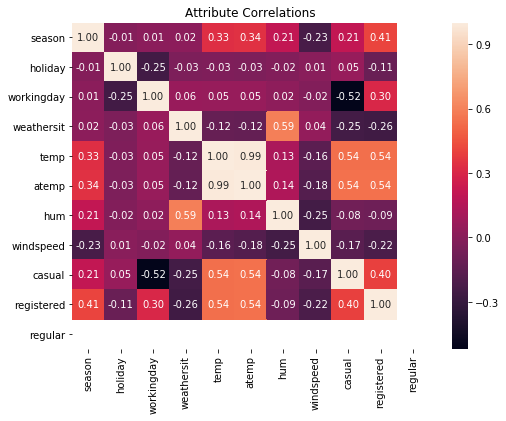

In [70]:
plt.subplots(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,fmt=".2f")
plt.title("Attribute Correlations")
plt.show()

- The correlation score of atemp and temp is 0.99, which suggest great collinearity of these two variables. This makes sense as the feeling temperature is linearly dependent on the real temperature. Therefore, one of the 2 variables should be excluded in the following analysis. Finally I decide to exclude temp and maintain atemp, for the reason that people's behavior would be affected more by the feeling temperature. 
- Also, the value of working day can be calculated from other 2 variables, namely, weekend and holiday. <br>To be more specific, if weekend == 0 and holiday ==0, then working day = 1. Therefore, the variable of working day is also excluded in this analysis.

# 4. Exploratory Data Analysis

## The effect of temperature

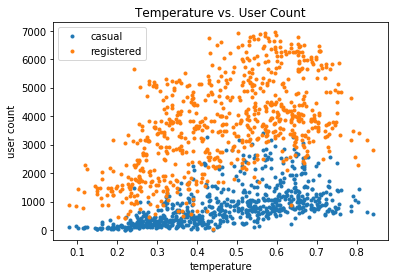

In [121]:
plt.plot(data['atemp'], data['casual'], '.')
plt.plot(data['atemp'], data['registered'], '.')
plt.title('Temperature vs. User Count')
plt.legend()
plt.xlabel('temperature')
plt.ylabel('user count')
plt.show()

It can be seen that in general the feeling temperature has a first positive then negative effect on the both types of users, meaning that the higher the temperature, the more users of bike sharing. Moreover, the effecr seems greater on the registered users.

## The effect of humidity

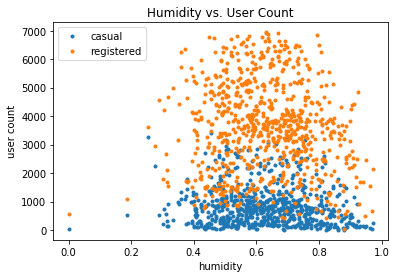

In [122]:
plt.plot(data['hum'], data['casual'], '.')
plt.plot(data['hum'], data['registered'], '.')
plt.title('Humidity vs. User Count')
plt.legend()
plt.xlabel('humidity')
plt.ylabel('user count')
plt.show()

It can be seen that the humidity has roughly first positive then negative effect on the both types of users, especially for the registered users.

## The effect of windspeed

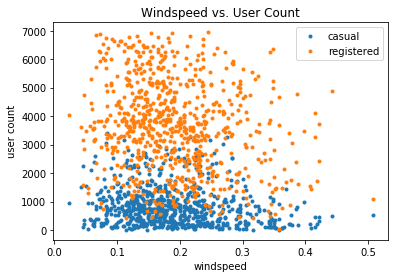

In [123]:
plt.plot(data['windspeed'], data['casual'], '.')
plt.plot(data['windspeed'], data['registered'], '.')
plt.title('Windspeed vs. User Count')
plt.legend()
plt.xlabel('windspeed')
plt.ylabel('user count')
plt.show()

According to the visualization of the data, there is hardly an apparent relationship between the windspeed and the user count.

## The effect of weathersite

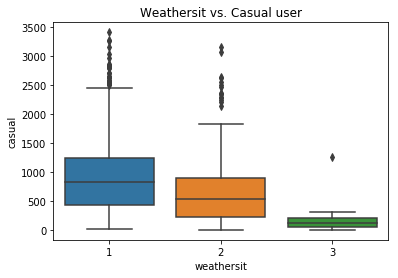

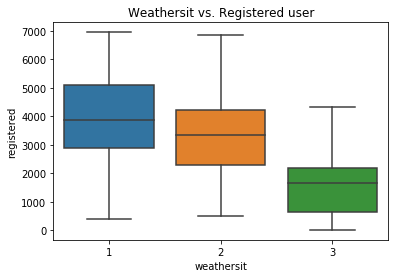

In [105]:
sns.boxplot(x='weathersit', y='casual', data=data)
plt.title('Weathersite vs. Casual user')
plt.show()
sns.boxplot(x='weathersit', y='registered', data=data)
plt.title('Weathersite vs. Registered user')
plt.show()

According to the visualization of the data, the more severe the weather, the fewer people would use sharing bikes, no matter it is casual user or registered user.

## The effect of season 

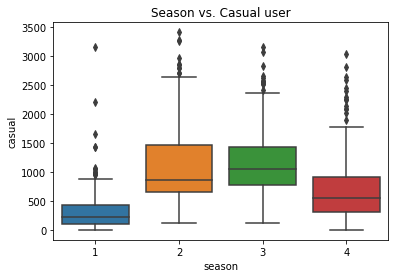

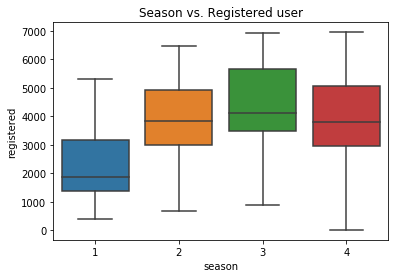

In [106]:
sns.boxplot(x='season', y='casual', data=data)
plt.title('Season vs. Casual user')
plt.show()
sns.boxplot(x='season', y='registered', data=data)
plt.title('Season vs. Registered user')
plt.show()

From the boxplots above, it can be concluded that there are more users in summer and fall where there are fewer users in spring and winter. 

## The effect of holiday

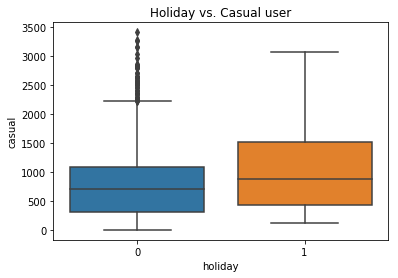

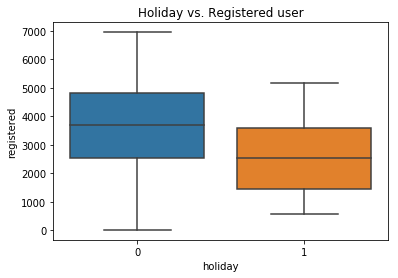

In [107]:
sns.boxplot(x='holiday', y='casual', data=data)
plt.title('Holiday vs. Casual user')
plt.show()
sns.boxplot(x='holiday', y='registered', data=data)
plt.title('Holiday vs. Registered user')
plt.show()

According to the visualization, it can be seen that the holiday (such as Thanksgiving, Christmas, MLK day, etc.) has reverse effect on the 2 types of users. More specifically, it encourages the use of bike sharing for casual users whereas discourage the use of bike sharing for registered users.

## The effect of working day (days except holidays and weekends)

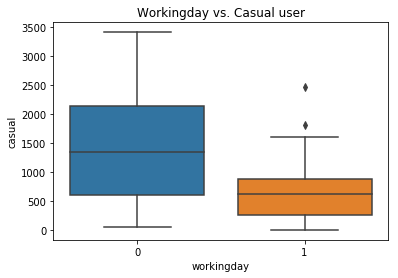

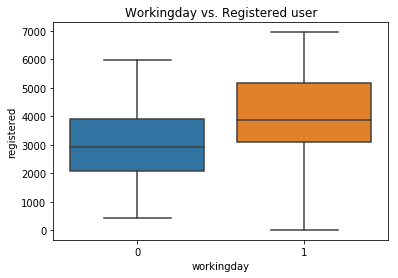

In [120]:
sns.boxplot(x='workingday', y='casual', data=data)
plt.title('Workingday vs. Casual user')
plt.show()
sns.boxplot(x='workingday', y='registered', data=data)
plt.title('Workingday vs. Registered user')
plt.show()

According to the visualization, it can be seen that working day also has reverse effect on the 2 types of users. To be more specific, there are fewer casual users and more registered users on working days.

# 5. Insights

- There seems to be quadratic relations between temperature and user count. At the beginning, as it becomes warmer, the number of users goes up accordingly until the temperature reaches some certain point. Afterwords, the users tend not to use bike sharing as it gets hotter.
- Similarly, there seems to be quadratic relations between humidity and user count, too.
- When the humidity or wind speed increases, the falling of the number of registered users tends to be greater than casual users.
- In terms of weathersite, there are fewers users in severe weather, which make sense. Interestingly, the casual users have higher “tolerance” to severe weathers.
- In terms of season, there are more users in summer and fall.
- The holiday and working day have reverse effect on the two type of users. Casual users tends to use bike sharing more when it is holiday and not working day, and the registered users behave in opposite.


# 6. Limitations
- The total number of observations is not great enough.
- More variables might be also considered in the model.
- The lack of certain kind of observations make it hard to explore some certain effect. For example, there are very few holiday=1 and weathersit=3 observations, which make it hard to determine whether there is interaction between holiday and the association between user number and weather condition.
- Some of these differences reactions above can be explained by the nature of the two kinds of users. For example, the registered users may use bike sharing more for daily commuter, therefore the number of them decrease when it is holiday. However, Some other differences such as seasonal differences require more study to explain.